In [1]:
%pip install deap

import numpy as np
import pandas as pd  # Added to read the CSV file
from deap import algorithms, base, creator, tools, gp
import random

Note: you may need to restart the kernel to use updated packages.


In [3]:
# --- Data Loading ---
data = pd.read_csv("5-node.csv", index_col=0)  # Read the CSV, use first column as index
distances = data.values  # distances are in the body of the data frame
num_cities = len(distances)  # Number of cities is the length of the data frame

In [4]:
# --- Fitness Function ---
def total_distance(individual, distances):
    total_dist = 0
    for i in range(num_cities):
        city1 = individual[i]
        city2 = individual[(i + 1) % num_cities]  # Wrap around to the start for the last city
        total_dist += distances[city1, city2]
    return total_dist,

In [5]:
# --- Genetic Algorithm Setup ---
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Minimize total distance
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_cities), num_cities)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", total_distance, distances=distances)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [6]:
# --- Run Genetic Algorithm ---
pop_size = 100
generations = 100
cxpb = 0.8
mutpb = 0.2

In [7]:
pop = toolbox.population(n=pop_size)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)

In [8]:
algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=generations, 
                    stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg   	min
0  	100   	115.11	103
1  	84    	109.88	103
2  	87    	110.35	103
3  	90    	109.38	103
4  	76    	111.08	103
5  	79    	109.63	103
6  	86    	108.25	103
7  	83    	106.51	103
8  	85    	104.63	103
9  	80    	104.35	103
10 	89    	104.86	103
11 	71    	103.43	103
12 	81    	104.09	103
13 	88    	103.67	103
14 	83    	103.51	103
15 	75    	103.03	103
16 	84    	103.13	103
17 	82    	103.22	103
18 	89    	103.46	103
19 	81    	103.47	103
20 	79    	103.26	103
21 	80    	103.47	103
22 	84    	103.26	103
23 	75    	103.01	103
24 	97    	103.49	103
25 	93    	103.27	103
26 	90    	103.71	103
27 	83    	103.24	103
28 	89    	103.05	103
29 	86    	103.31	103
30 	82    	103.26	103
31 	85    	103.09	103
32 	85    	103.03	103
33 	84    	103.42	103
34 	71    	103.68	103
35 	87    	103.28	103
36 	93    	103.44	103
37 	92    	103.52	103
38 	81    	103.29	103
39 	88    	103.86	103
40 	81    	103.2 	103
41 	73    	103.07	103
42 	81    	103.64	103
43 	91    	103.64	103
44 	93    

([[3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 1, 0, 2],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [2, 4, 3, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 0, 1],
  [3, 4, 2, 

In [9]:
# --- Results ---
best_individual = hof[0]
best_distance = best_individual.fitness.values[0]

In [10]:
print("Optimal route (indices):", best_individual)
print("Optimal route (city names):", data.index[best_individual].tolist()) #Print city names from the index
print("Total Distance:", best_distance)

Optimal route (indices): [3, 4, 2, 0, 1]
Optimal route (city names): ['D', 'E', 'C', 'A', 'B']
Total Distance: 103.0


In [11]:
# --- Visualization (requires matplotlib) ---
import matplotlib.pyplot as plt

#This visualization assumes coordinates are available and would require modification if only distances are available
#Uncomment the following lines if coordinates are available to replace the placeholder coordinates used above

# coords = np.array([[0, 0], [1, 1], [2, 0], [0, 2], [2, 2]]) #replace with actual coordinates from the data frame if available

In [12]:
def plot_route(route_indices, coords):
    x = [coords[i][0] for i in route_indices]
    y = [coords[i][1] for i in route_indices]
    x.append(coords[route_indices[0]][0])
    y.append(coords[route_indices[0]][1])
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, marker='o', linestyle='-', markersize=8, linewidth=2)
    plt.xlabel("X-coordinate")
    plt.ylabel("Y-coordinate")
    plt.title("TSP Route Visualization")
    plt.grid(True)
    for i, txt in enumerate(route_indices):
        plt.annotate(str(txt), (x[i], y[i]), textcoords="offset points", xytext=(0, 5), ha='center')
    plt.show()
    
# plot_route(best_individual, coords) #Uncomment if coords is available

In [ ]:
##############################################new code##################

In [13]:
import numpy as np
import pandas as pd
from deap import algorithms, base, creator, tools, gp
import random
import networkx as nx  # Added for graph visualization
import matplotlib.pyplot as plt



In [14]:
# --- Data Loading ---
data = pd.read_csv("5-node.csv", index_col=0)
distances = data.values
num_cities = len(distances)
city_names = data.index.tolist()



In [15]:
# --- Fitness Function ---
def total_distance(individual, distances):
    total_dist = 0
    for i in range(num_cities):
        city1 = individual[i]
        city2 = individual[(i + 1) % num_cities]
        total_dist += distances[city1, city2]
    return total_dist,

# --- Genetic Algorithm Setup ---
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)



/home/alamma/miniconda3/envs/qc/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/alamma/miniconda3/envs/qc/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [16]:
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_cities), num_cities)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", total_distance, distances=distances)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)



In [17]:
# --- Run Genetic Algorithm ---
pop_size = 100
generations = 100
cxpb = 0.8
mutpb = 0.2

pop = toolbox.population(n=pop_size)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)



In [18]:
algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=generations,
                    stats=stats, halloffame=hof, verbose=True)

# --- Results ---
best_individual = hof[0]
best_distance = best_individual.fitness.values[0]

print("Optimal route (indices):", best_individual)
print("Optimal route (city names):", [city_names[i] for i in best_individual])
print("Total Distance:", best_distance)



gen	nevals	avg   	min
0  	100   	114.91	103
1  	80    	111.43	103
2  	83    	108.89	103
3  	83    	110.05	103
4  	85    	107.07	103
5  	78    	108.5 	103
6  	90    	108.44	103
7  	93    	108.22	103
8  	87    	107.51	103
9  	88    	107.84	103
10 	85    	107.5 	103
11 	86    	107.36	103
12 	92    	106.3 	103
13 	78    	104.91	103
14 	88    	103.79	103
15 	82    	103.7 	103
16 	90    	103.77	103
17 	86    	103.92	103
18 	79    	103.28	103
19 	74    	103.26	103
20 	87    	103.5 	103
21 	90    	103.54	103
22 	83    	103.49	103
23 	81    	103.88	103
24 	85    	103.47	103
25 	86    	103.89	103
26 	77    	103.3 	103
27 	80    	103.49	103
28 	82    	103.15	103
29 	86    	103.32	103
30 	82    	103.96	103
31 	85    	103.47	103
32 	85    	103.88	103
33 	88    	103.68	103
34 	87    	103.5 	103
35 	81    	103.11	103
36 	88    	103.23	103
37 	81    	103.46	103
38 	91    	103.89	103
39 	84    	103.25	103
40 	90    	103.06	103
41 	91    	104.02	103
42 	86    	103.71	103
43 	84    	103.26	103
44 	89    

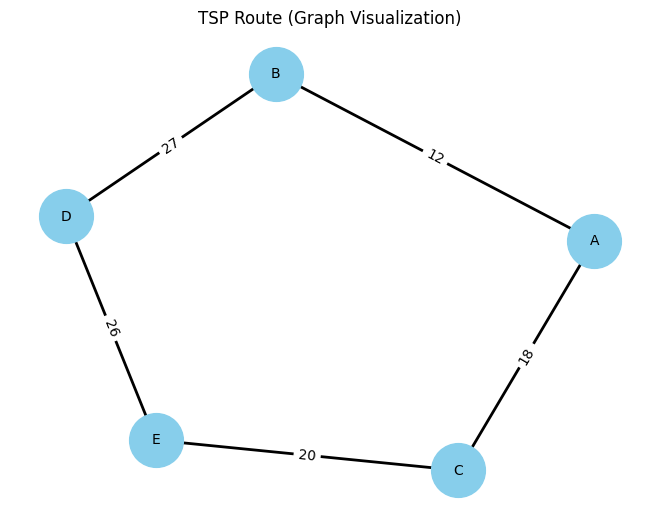

In [19]:
# --- Visualization (graph-based) ---
graph = nx.Graph()
graph.add_nodes_from(city_names)

# Add edges based on the optimal route
for i in range(num_cities):
    city1 = city_names[best_individual[i]]
    city2 = city_names[best_individual[(i + 1) % num_cities]]
    graph.add_edge(city1, city2, weight=distances[best_individual[i], best_individual[(i + 1) % num_cities]])

pos = nx.spring_layout(graph) # positions for all nodes
nx.draw(graph, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=10, width=2)
labels = nx.get_edge_attributes(graph,'weight')
nx.draw_networkx_edge_labels(graph,pos,edge_labels=labels)
plt.title("TSP Route (Graph Visualization)")
plt.show()